In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsRegressor
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
url='https://drive.google.com/file/d/1dyGflYAeAugtOxlHZwpVLkf84lO8a2KD/view?usp=drive_link'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)
df

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.000000,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,...,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,...,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,...,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,...,0.000000,0.000000,865,0,0,0,50000,50000,4,0


In [ ]:
# cleaning
df.drop(columns =['player', 'name'], axis=1, inplace=True)

In [ ]:
df

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,Goalkeeper,189.000000,32.0,104,0.000000,0.000000,0.009585,0.0,0.000000,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,Manchester United,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,0.0,0.000000,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,Manchester United,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,0.0,0.000000,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,Manchester United,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,0.224719,0.0,0.000000,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,Manchester United,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.053667,0.0,0.000000,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,Western Sydney Wanderers,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,0.000000,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,Western Sydney Wanderers,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,0.000000,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,Western Sydney Wanderers,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,0.000000,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,Western Sydney Wanderers,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,0.104046,0.000000,0.000000,865,0,0,0,50000,50000,4,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 10754 non-null  object 
 1   position             10754 non-null  object 
 2   height               10754 non-null  float64
 3   age                  10754 non-null  float64
 4   appearance           10754 non-null  int64  
 5   goals                10754 non-null  float64
 6   assists              10754 non-null  float64
 7   yellow cards         10754 non-null  float64
 8   second yellow cards  10754 non-null  float64
 9   red cards            10754 non-null  float64
 10  goals conceded       10754 non-null  float64
 11  clean sheets         10754 non-null  float64
 12  minutes played       10754 non-null  int64  
 13  days_injured         10754 non-null  int64  
 14  games_injured        10754 non-null  int64  
 15  award                10754 non-null 

In [ ]:
df.isna().sum() #Kiểm tra xem có giá trị nào bị thiếu không

team                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [ ]:
df.isnull().sum()

team                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [ ]:
df.duplicated().sum() #kiểm tra và đếm số lượng dòng trùng lặp

0

In [ ]:
df.drop_duplicates()

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,Goalkeeper,189.000000,32.0,104,0.000000,0.000000,0.009585,0.0,0.000000,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,Manchester United,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,0.0,0.000000,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,Manchester United,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,0.0,0.000000,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,Manchester United,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,0.224719,0.0,0.000000,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,Manchester United,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.053667,0.0,0.000000,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,Western Sydney Wanderers,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,0.000000,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,Western Sydney Wanderers,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,0.000000,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,Western Sydney Wanderers,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,0.000000,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,Western Sydney Wanderers,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,0.104046,0.000000,0.000000,865,0,0,0,50000,50000,4,0


In [ ]:
# Kiểm tra dữ liệu có bị nhiễu hay không
print(df.describe())
print(df.info())
print(df.value_counts())

             height           age    appearance         goals       assists  \
count  10754.000000  10754.000000  10754.000000  10754.000000  10754.000000   
mean     181.240353     26.041903     36.407011      0.125554      0.086978   
std        6.969818      4.777629     26.526541      0.235585      0.143351   
min      156.000000     15.000000      0.000000      0.000000      0.000000   
25%      176.000000     22.000000     12.000000      0.000000      0.000000   
50%      181.240353     26.000000     35.000000      0.045969      0.040773   
75%      186.000000     29.000000     59.000000      0.172263      0.133136   
max      206.000000     43.000000    107.000000     11.250000      4.000000   

       yellow cards  second yellow cards     red cards  goals conceded  \
count  10754.000000         10754.000000  10754.000000    10754.000000   
mean       0.189757             0.004666      0.006826        0.131655   
std        0.432388             0.025232      0.081143        0.44

#**Rừng ngẫu nhiên (Random Forest)**

**Chuẩn hóa dữ liệu**

In [ ]:
# encoding
from sklearn.preprocessing import LabelEncoder

encoders = {}
text_features = ['team', 'position']
for feature in text_features:
    encoders[feature] = LabelEncoder()
    df[feature+"_encoded"] = encoders[feature].fit_transform(df[feature])


In [ ]:
df


,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,...,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,team_encoded
0,Manchester United,Goalkeeper,189.000000,32.0,104,0.000000,0.000000,0.009585,0.0,0.000000,...,0.335463,9390,42,5,13,15000000,70000000,9,0,226
1,Manchester United,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,0.0,0.000000,...,0.207055,1304,510,58,1,1500000,22000000,9,0,226
2,Manchester United,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,0.0,0.000000,...,0.924658,292,697,84,4,600000,6000000,9,0,226
3,Manchester United,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,0.224719,0.0,0.000000,...,0.000000,6408,175,22,9,50000000,50000000,6,0,226
4,Manchester United,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.053667,0.0,0.000000,...,0.000000,5031,238,51,21,40000000,80000000,6,0,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,Western Sydney Wanderers,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,0.000000,...,0.000000,1023,0,0,0,75000,75000,3,1,365
10750,Western Sydney Wanderers,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,0.000000,...,0.000000,1449,102,18,0,300000,300000,1,0,365
10751,Western Sydney Wanderers,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,0.000000,...,0.000000,960,0,0,0,50000,50000,1,0,365
10752,Western Sydney Wanderers,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,0.104046,...,0.000000,865,0,0,0,50000,50000,1,0,365


#**Biểu đồ tương quan của các biến**

<Axes: >

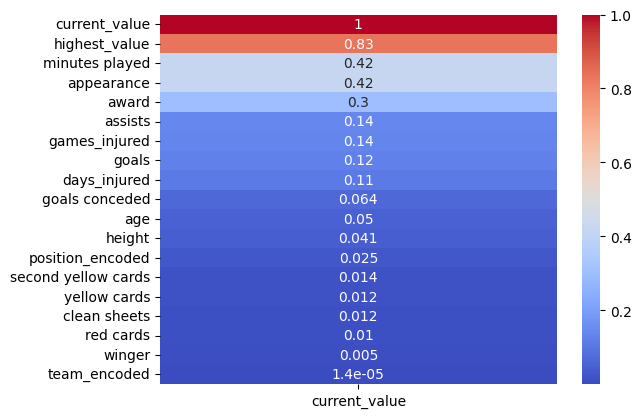

In [ ]:
# lựa chọn tính năng
# hiển thị mức độ tương quan của các biến số với biến mục tiêu
import seaborn as sns
df_cleaned = df.drop(columns=['team', 'position'], axis=1)
corr = df_cleaned.corr()['current_value'].abs().sort_values(ascending=False)
sns.heatmap(corr.to_frame(), annot=True, cmap='coolwarm' )


In [ ]:
threshold = 0.005
corr = df_cleaned.corr()['current_value']
features_less_than_threshold = corr[abs(corr)<threshold].index
print(f"Removing these features: {features_less_than_threshold}")
df_cleaned.drop(columns=features_less_than_threshold, inplace=True)

Removing these features: Index(['team_encoded'], dtype='object')


In [ ]:
# splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_cleaned.drop('current_value', axis=1), df_cleaned['current_value'], test_size= 0.2)

In [ ]:
# train and test
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", RandomForestRegressor(n_estimators=150))
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
r2_squared_score = r2_score(y_test, y_pred)
print(f"Root squared score with RandomForestRegressor is: {r2_squared_score}")

Root squared score with RandomForestRegressor is: 0.9269152775188647


#**linear regression**

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Đọc dữ liệu từ file CSV
url='https://drive.google.com/file/d/1dyGflYAeAugtOxlHZwpVLkf84lO8a2KD/view?usp=drive_link'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

# Chọn thuộc tính độc lập và biến phụ thuộc
X = df[['highest_value', 'award', 'minutes played', 'age', 'appearance', 'goals', 'assists','position_encoded']]

y = df['current_value']  # Giá trị chuyển nhượng

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)


# Dự đoán giá trị chuyển nhượng trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình Root Mean Squared Error (RMSE) và R-squared (R2)o
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

RMSE: 4728609.36
R-squared: 0.75


**Kiểm tra rmse có hợp với data không**

In [ ]:
#in ra một số thống kê mô tả của biến phụ thuộc y
print(y.describe())


count    1.075400e+04
mean     3.622971e+06
std      9.095410e+06
min      0.000000e+00
25%      3.000000e+05
50%      8.000000e+05
75%      3.000000e+06
max      1.800000e+08
Name: current_value, dtype: float64


In [ ]:
# tính toán và in ra phạm vi giá trị của biến phụ thuộc y
value_range = y.max() - y.min()
print(f"Phạm vi giá trị: {value_range}")

Phạm vi giá trị: 180000000


In [ ]:
#Sai số trung bình chuẩn (RMSE)
rmse_ratio = rmse / value_range
print(f"Tỷ lệ RMSE/Phạm vi giá trị: {rmse_ratio:.6f}")


Tỷ lệ RMSE/Phạm vi giá trị: 0.026270


**Text thêm một cầu thủ mới**

In [ ]:
# Dự đoán giá chuyển nhượng cho cầu thủ mới
# Thay thế bằng các giá trị thuộc tính của cầu thủ mới
new_player_features = pd.DataFrame([[1800000, 10, 250, 20, 1.9, 100, 50, 1]])
# Sử dụng mô hình đã huấn luyện
predicted_transfer_fee = model.predict(new_player_features)
print(f"Predicted transfer fee for the new player: {predicted_transfer_fee[0]:.2f} million dollars")
#['highest_value', 'award', 'minutes played', 'age', 'appearance', 'goals', 'assists','position_encoded']

Predicted transfer fee for the new player: 126406213.36 million dollars


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


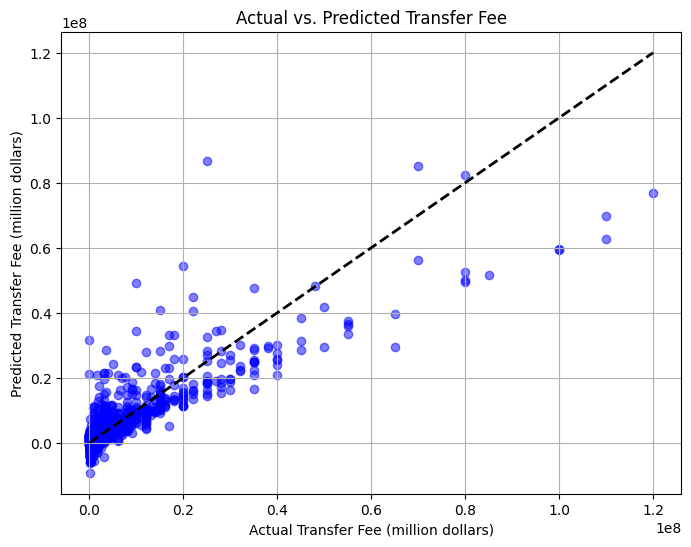

In [ ]:
import matplotlib.pyplot as plt

# Dự đoán giá trị chuyển nhượng trên tập kiểm tra
y_pred = model.predict(X_test)

# Vẽ biểu đồ so sánh giá trị thực tế và giá trị dự đoán
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='b', alpha=0.5) #màu chữ - độ mờ

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual Transfer Fee (million dollars)')
plt.ylabel('Predicted Transfer Fee (million dollars)')
plt.title('Actual vs. Predicted Transfer Fee')
plt.grid(True) #Bật lưới cho biểu đồ
plt.show()


#**Regression Decision Tree**

In [ ]:
url='https://drive.google.com/file/d/1dyGflYAeAugtOxlHZwpVLkf84lO8a2KD/view?usp=drive_link'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


**Chia dữ liệu huận luyện và dữ liệu thử nghiệm**

In [ ]:
X = df.drop('current_value', axis=1) # Các biến độc lập
y = df['current_value'] # Biến phụ thuộc/mục tiêu

**Chuẩn hoá dữ liệu**

In [ ]:
# Xác định các cột numerical và cột categorical
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X.select_dtypes(exclude=['number']).columns.tolist()

# Tiền xử lý dữ liệu numerical và categorical
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Áp dụng tiền xử lý dữ liệu bằng ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'
)

# Áp dụng tiền xử lý dữ liệu
X_preprocessed = preprocessor.fit_transform(X)
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


**Dữ liệu sau khi chuẩn hóa**

In [ ]:
pd.DataFrame(X_preprocessed)

,0
0,"(0, 0)\t1.1133730718742276\n (0, 1)\t1.2471..."
1,"(0, 0)\t2.1177501292804517\n (0, 1)\t0.8285..."
2,"(0, 0)\t0.9698906351019099\n (0, 1)\t2.2937..."
3,"(0, 0)\t-0.8953810429382203\n (0, 1)\t-0.21..."
4,"(0, 0)\t1.4003379454188631\n (0, 1)\t0.8285..."
...,...
10749,"(0, 0)\t-2.527020174973852e-09\n (0, 1)\t-1..."
10750,"(0, 0)\t1.2568555086465454\n (0, 1)\t-0.427..."
10751,"(0, 0)\t-2.527020174973852e-09\n (0, 1)\t-1..."
10752,"(0, 0)\t-2.527020174973852e-09\n (0, 1)\t-1..."


**Modelling**

Decision Tree Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)
# Khởi tạo và huấn luyện một đối tượng DecisionTreeRegressor
regression_tree = DecisionTreeRegressor(max_depth=8)
regression_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [ ]:
# Dự đoán phí chuyển nhượng của các cầu thủ trong tập kiểm tra
y_pred = regression_tree.predict(X_test)

In [ ]:
# Đánh giá hiệu suất của mô hình
mse = mean_squared_error(y_test, y_pred) # Sai số trung bình bình phương
r2 = r2_score(y_test, y_pred) # Hệ số xác định
print("MSE:", mse)
print("R-squared:", r2)

MSE: 10957105873553.42
R-squared: 0.8788395719202856


In [ ]:
#Find the best max-depth for DT algorithm
# Define a range of max_depth values to iterate over
max_depth_values = range(3, 20)  # You can adjust this range

# Initialize variables to keep track of the best max depth and corresponding score
best_max_depth = None
best_score = 0.0

# Iterate over different max_depth values
for max_depth in max_depth_values:
    # Initialize the DecisionTreeRegressor with the current max_depth
    clf = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    # Fit the model to the training data
    clf.fit(X_train, y_train)
    # Evaluate the model on the test data
    test_score = clf.score(X_test, y_test)
    # Perform cross-validation on the training data
    #cv_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    # Print the score for the current max_depth
    print(f"Max Depth = {max_depth}: Test Score = {test_score}")
    # Check if the current model has a better score than the previous best
    if test_score > best_score:
        best_score = test_score
        best_max_depth = max_depth

# Print the best max depth and corresponding score
print(f"Best Max Depth = {best_max_depth}: Best Test Score = {best_score}")

Max Depth = 3: Test Score = 0.7893604770146232
Max Depth = 4: Test Score = 0.8126326094079426
Max Depth = 5: Test Score = 0.8590221606890518
Max Depth = 6: Test Score = 0.8811341911101771
Max Depth = 7: Test Score = 0.8822290839838061
Max Depth = 8: Test Score = 0.8829118542277944
Max Depth = 9: Test Score = 0.8694409464828203
Max Depth = 10: Test Score = 0.8543512120526245
Max Depth = 11: Test Score = 0.8602368018227298
Max Depth = 12: Test Score = 0.8601346590443762
Max Depth = 13: Test Score = 0.8571450062539004
Max Depth = 14: Test Score = 0.8654462848046638
Max Depth = 15: Test Score = 0.8451370454434438
Max Depth = 16: Test Score = 0.853068712820561
Max Depth = 17: Test Score = 0.8614878176496095
Max Depth = 18: Test Score = 0.8637808190546585
Max Depth = 19: Test Score = 0.8596376651669198
Best Max Depth = 8: Best Test Score = 0.8829118542277944


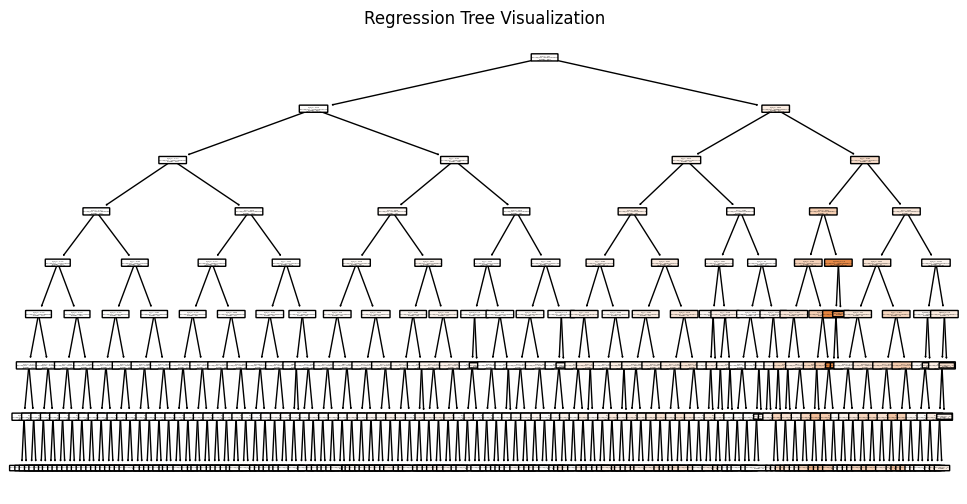

In [ ]:
from sklearn.tree import plot_tree

# Visualize the regression tree
plt.figure(figsize=(12, 6))
plot_tree(regression_tree, filled=True, rounded=True)
plt.title("Regression Tree Visualization")
plt.show()

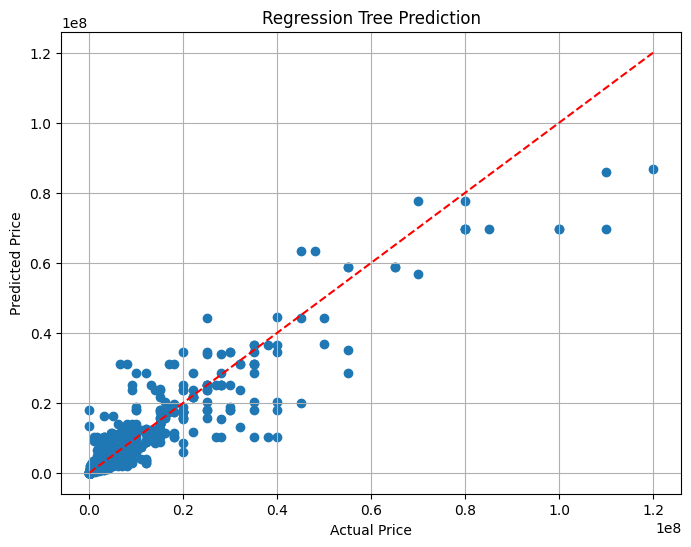

In [ ]:
# Vẽ biểu đồ thể hiện mối quan hệ giữa giá thực tế và dự đoán
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred) # Vẽ các điểm dữ liệu
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red') # Vẽ đường tham chiếu y = x
plt.xlabel("Actual Price") # Đặt tên trục hoành
plt.ylabel("Predicted Price") # Đặt tên trục tung
plt.title("Regression Tree Prediction") # Đặt tên biểu đồ
plt.grid(True) #Bật lưới cho biểu đồ
plt.show() # Hiển thị biểu đồ

#**K-Nearest Neighbors**

**Phân tích dữ liệu thăm dò (EDA):**

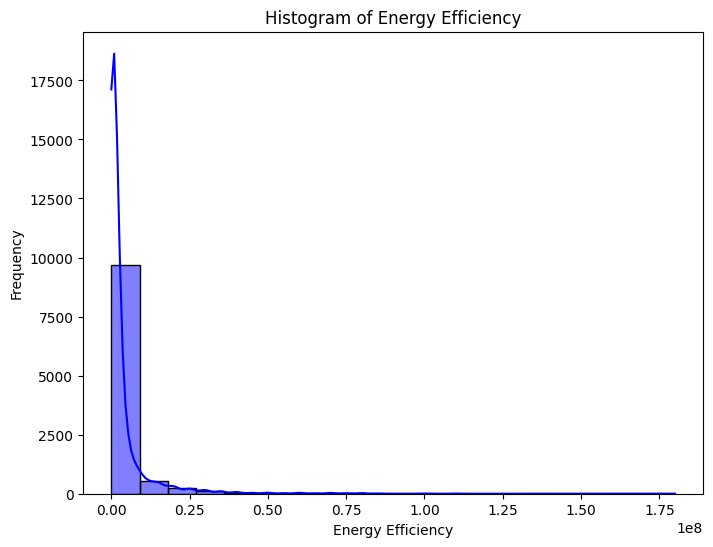

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(df['current_value'], kde=True, color='blue', bins=20)
plt.title('Histogram of Energy Efficiency')
plt.xlabel('Energy Efficiency')
plt.ylabel('Frequency')
plt.show()

<ipython-input-94-07f29dcdab93>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


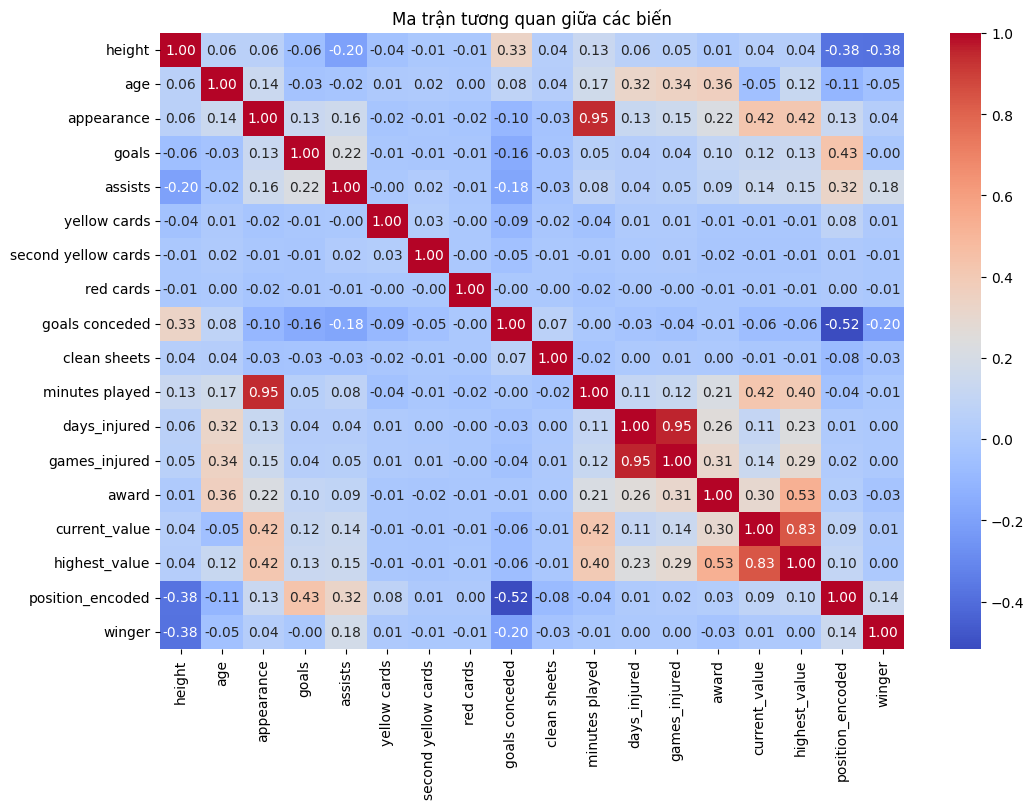

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma trận tương quan giữa các biến')
plt.show()

**Kỹ thuật tính năng**

In [ ]:
correlation = df.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value          1.000000
highest_value          0.834553
minutes played         0.420542
appearance             0.419656
award                  0.300454
assists                0.137415
games_injured          0.135654
goals                  0.121574
days_injured           0.107686
position_encoded       0.085154
height                 0.040535
winger                 0.005034
red cards             -0.010171
clean sheets          -0.011684
yellow cards          -0.011766
second yellow cards   -0.013889
age                   -0.050156
goals conceded        -0.063529
Name: current_value, dtype: float64


<ipython-input-95-756081af6167>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


In [ ]:
def correlation(dataset, threshold):
    col_corr = set()
    #Correlation của tập dữ liệu chỉ có giá trị số.
    corr_matrix = dataset.corr(numeric_only=True)
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            #Making một hình vuông j lần i và lưu trữ nó.
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

**Thuật Toán KNN**

In [ ]:
# Xây dựng và huấn luyện mô hình KNN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
# Dự đoán trên tập kiểm tra
y_pred = knn_model.predict(X_test)
# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 17553817008833.102
R-squared Score: 0.8058950960438741
